In [1]:
import pandas as pd

In [2]:
travel_file = './국민 해외관광객 주요 목적지별 통계(202311).xlsx'

In [3]:
travelDF = pd.read_excel(travel_file, sheet_name='Asia', index_col=[0, 1], header=[1, 2])
travelDF = travelDF[[('법무부・KTO','명수'), ('법무부・KTO','전년대비'), 
                     ('일본','명수'), ('Japan', '전년대비')]]
travelDF

법무부・KTO                   일본      Japan
                  명수      전년대비         명수       전년대비
2004년 1월    793478.0       NaN   164785.0        NaN
      2월    670447.0       NaN   142718.0        NaN
      3월    587629.0       NaN   112516.0        NaN
      4월    642413.0       NaN   120427.0        NaN
      5월    680185.0       NaN   115659.0        NaN
...              ...       ...        ...        ...
2020년 누계   4276006.0 -0.851084   487939.0  -0.912628
2021년 누계   1222541.0 -0.714093    18947.0  -0.961169
2022년 누계   6554031.0  4.360991  1012751.0  52.451787
2023년 누계  20300074.0  2.933598  6175767.0  10.095800
      누계         NaN       NaN        NaN        NaN

[265 rows x 4 columns]

In [4]:
# 연간 여행객, 월별 여행객 자료 분리
yearly_travelDF = travelDF[-25:-1]
travelDF = travelDF[:-25]
travelDF   # 월별

법무부・KTO                  일본      Japan
                  명수      전년대비        명수       전년대비
2004년 1월    793478.0       NaN  164785.0        NaN
      2월    670447.0       NaN  142718.0        NaN
      3월    587629.0       NaN  112516.0        NaN
      4월    642413.0       NaN  120427.0        NaN
      5월    680185.0       NaN  115659.0        NaN
...              ...       ...       ...        ...
2023년 8월   2093236.0  1.981168  569092.0  18.957636
      9월   2017157.0  2.253720  570369.0  16.408406
      10월  2042703.0  1.640925  631100.0   4.132605
      11월  2061646.0  0.979628  649900.0   1.060421
      12월        NaN       NaN       NaN        NaN

[240 rows x 4 columns]

In [5]:
import matplotlib as mpl                 # 패키지 관련
import matplotlib.font_manager as fm     # 패키지 리소스 중 폰트 관련 모듈

In [6]:
# 폰트 파일의 경로 저장
font_path = r'C:\Windows\Fonts\gulim.ttc'

In [7]:
# matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=myFont)

In [8]:
travelDF.index

MultiIndex([('2004년',  '1월'),
            ('2004년',  '2월'),
            ('2004년',  '3월'),
            ('2004년',  '4월'),
            ('2004년',  '5월'),
            ('2004년',  '6월'),
            ('2004년',  '7월'),
            ('2004년',  '8월'),
            ('2004년',  '9월'),
            ('2004년', '10월'),
            ...
            ('2023년',  '3월'),
            ('2023년',  '4월'),
            ('2023년',  '5월'),
            ('2023년',  '6월'),
            ('2023년',  '7월'),
            ('2023년',  '8월'),
            ('2023년',  '9월'),
            ('2023년', '10월'),
            ('2023년', '11월'),
            ('2023년', '12월')],
           length=240)

In [9]:
# travelDF의 인덱스를 datetime 객체로 만들기 위해 형식 변경하여 저장
dateList = ['-'.join([y[:-1], m[:-1], '1']) for y, m in travelDF.index]
dateList[:5]

['2004-1-1', '2004-2-1', '2004-3-1', '2004-4-1', '2004-5-1']

In [10]:
# travelDF의 인덱스를 datetime 객체로 바꾼 것 => dateSR
dateSR = pd.Series(dateList)
dateSR = dateSR.astype('datetime64[ns]')
dateSR

0     2004-01-01
1     2004-02-01
2     2004-03-01
3     2004-04-01
4     2004-05-01
         ...    
235   2023-08-01
236   2023-09-01
237   2023-10-01
238   2023-11-01
239   2023-12-01
Length: 240, dtype: datetime64[ns]

In [11]:
dateSR.iloc[0].strftime('%Y/%m')

'2004/01'

In [12]:
dateSR.dt.strftime('%Y/%m')

0      2004/01
1      2004/02
2      2004/03
3      2004/04
4      2004/05
        ...   
235    2023/08
236    2023/09
237    2023/10
238    2023/11
239    2023/12
Length: 240, dtype: object

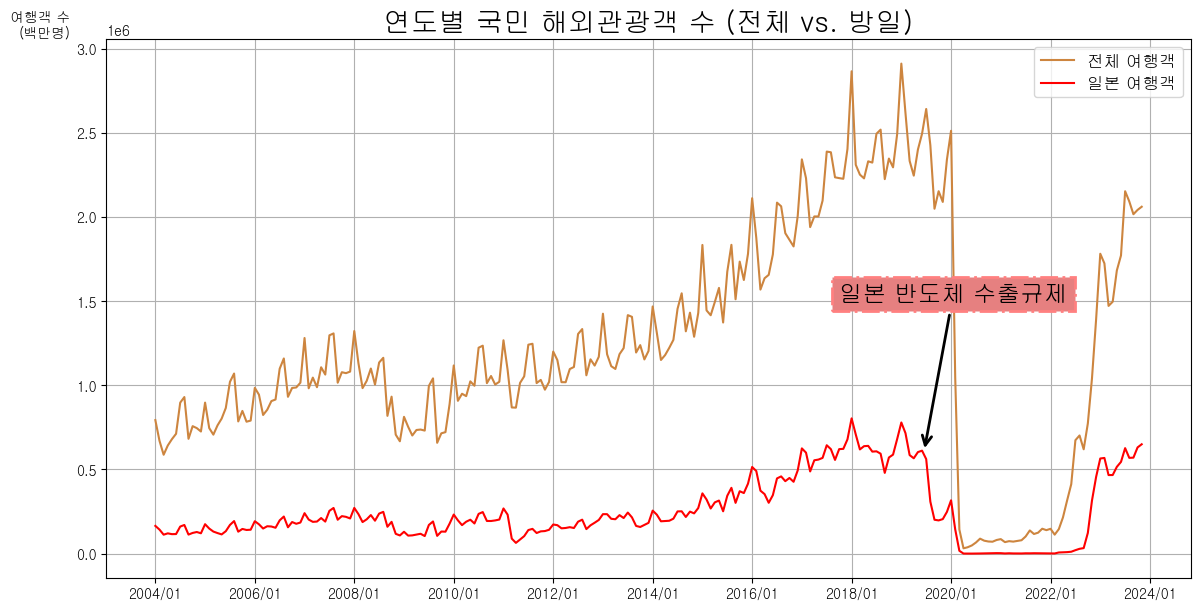

In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
plt.figure(figsize=(14, 7))
plt.title('연도별 국민 해외관광객 수 (전체 vs. 방일)', fontsize=20)
plt.plot(dateSR.dt.strftime('%Y/%m'), travelDF[('법무부・KTO','명수')].values, color='peru', label='전체 여행객')
plt.plot(dateSR.dt.strftime('%Y/%m'), travelDF[('일본','명수')].values, color='r',  label='일본 여행객')
plt.xticks(['2004/01', '2006/01', '2008/01', '2010/01', '2012/01', '2014/01', '2016/01', '2018/01', '2020/01', '2022/01', '2024/01'])
plt.ylabel('\n여행객 수\n(백만명)', loc='top', rotation='horizontal')
box1 = {'boxstyle': 'square',
        'ec': (1.0, 0.5, 0.5),
        'fc': (0.9, 0.5, 0.5),
        'linestyle': '-.',
        'linewidth': 2}
plt.annotate('일본 반도체 수출규제', xy=(185.5, 610000), xytext=(165, 1500000), 
             arrowprops=dict(facecolor='k', arrowstyle='->', linewidth=2), fontsize=17, bbox=box1)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [14]:
# 2019년, 2020년 인덱스만 추출하기 위해 불 Series 생성
the_years = (dateSR.dt.year == 2019) | (dateSR.dt.year == 2020)
the_years

0      False
1      False
2      False
3      False
4      False
       ...  
235    False
236    False
237    False
238    False
239    False
Length: 240, dtype: bool

In [15]:
# 2019년, 2020년 날짜 인덱스만 저장 => dateSR2
dateSR2 = dateSR[the_years]
dateSR2.head()

180   2019-01-01
181   2019-02-01
182   2019-03-01
183   2019-04-01
184   2019-05-01
dtype: datetime64[ns]

In [16]:
# travelDF 인덱스 초기화 => the_years 사용가능 (튜플 인덱스 -> 숫자 인덱스)
travelDF2 = travelDF.reset_index(drop=True)[the_years]
travelDF2.head()

법무부・KTO                  일본     Japan
            명수      전년대비        명수      전년대비
180  2912331.0  0.015889  779383.0 -0.030396
181  2617946.0  0.132815  715804.0  0.010569
182  2334153.0  0.036220  585586.0 -0.054280
183  2246417.0  0.007272  566624.0 -0.112602
184  2401204.0  0.029868  603394.0 -0.057720

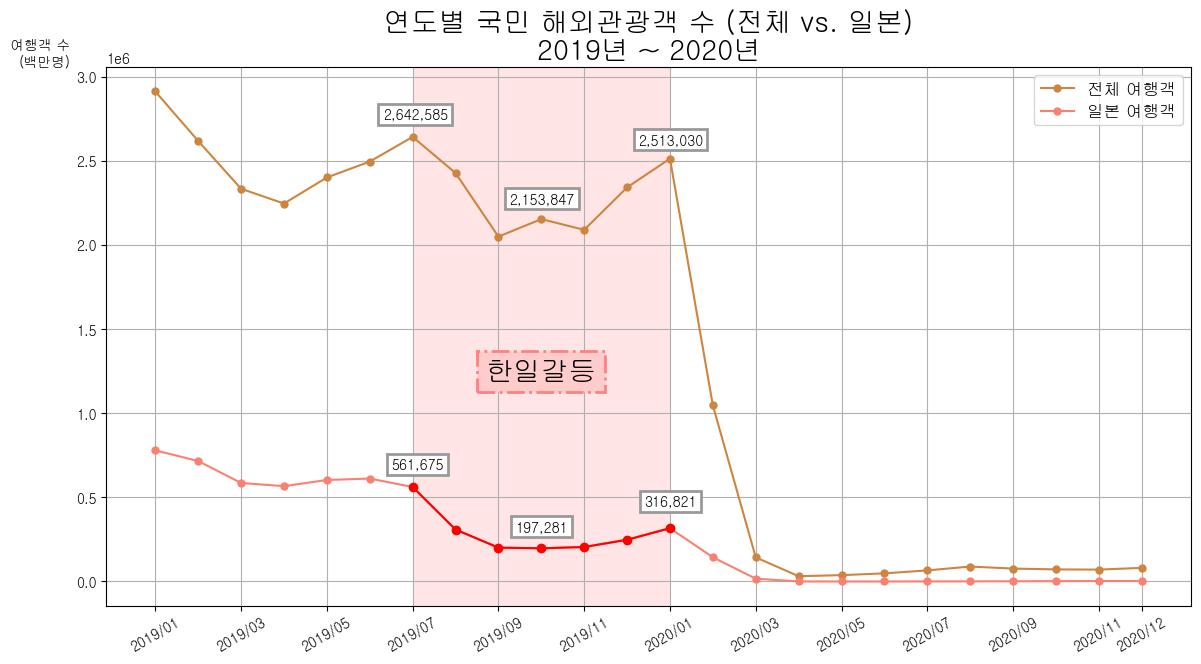

In [17]:
plt.figure(figsize=(14, 7))
plt.title('연도별 국민 해외관광객 수 (전체 vs. 일본)\n2019년 ~ 2020년', fontsize=20)
plt.plot(dateSR2.dt.strftime('%Y/%m'), travelDF2[('법무부・KTO','명수')].values, color='peru', marker = 'o', markersize = 5, label='전체 여행객')
plt.plot(dateSR2.dt.strftime('%Y/%m'), travelDF2[('일본','명수')].values, color='salmon', marker = 'o', markersize = 5, label='일본 여행객')
plt.plot(dateSR.iloc[186:193].dt.strftime('%Y/%m'), travelDF2.loc[186:192, ('일본','명수')], color = 'r', marker = 'o')
plt.xticks(['2019/01', '2019/03', '2019/05', '2019/07', '2019/09', '2019/11', 
            '2020/01', '2020/03', '2020/05', '2020/07', '2020/09', '2020/11', '2020/12'], rotation=30)
plt.ylabel('\n여행객 수\n(백만명)', loc='top', rotation='horizontal')
plt.axvspan('2019/07', '2020/01', facecolor='red', alpha=0.1)
box2 = {'boxstyle': 'square',
        'ec': (1.0, 0.5, 0.5),
        'fc': (1.0, 0.8, 0.8),
        'linestyle': '-.',
        'linewidth': 2}
box3 = {'boxstyle': 'square',
        'ec': (0.6, 0.6, 0.6),
        'fc': (1, 1, 1),
        'linestyle': '-',
        'linewidth': 2}
plt.text(7.7, 1200000, '한일갈등', fontsize=20, bbox=box2)
plt.text(5.3, 2750000, '2,642,585', fontsize=10, bbox=box3)
plt.text(8.25, 2250000, '2,153,847', fontsize=10, bbox=box3)
plt.text(11.25, 2600000, '2,513,030', fontsize=10, bbox=box3)
plt.text(5.5, 670000, '561,675', fontsize=10, bbox=box3)
plt.text(8.4, 300000, '197,281', fontsize=10, bbox=box3)
plt.text(11.4, 450000, '316,821', fontsize=10, bbox=box3)
plt.legend(fontsize=12)
plt.grid()
plt.show()

In [18]:
is_highlight = dateSR >= dateSR.iloc[186]
is_highlight

0      False
1      False
2      False
3      False
4      False
       ...  
235     True
236     True
237     True
238     True
239     True
Length: 240, dtype: bool

In [19]:
dateSR.iloc[186:193].dt.strftime('%Y/%m')

186    2019/07
187    2019/08
188    2019/09
189    2019/10
190    2019/11
191    2019/12
192    2020/01
dtype: object

In [20]:
travelDF2.loc[186:192, ('일본','명수')]

186    561675.0
187    308730.0
188    201252.0
189    197281.0
190    205042.0
191    247959.0
192    316812.0
Name: (일본, 명수), dtype: float64